In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import graphtable as gt

In [2]:
from importlib import reload

reload(gt)
# reload(gexf)
# reload(util)

<module 'graphtable' from '/Users/paola/Projs/GraphTable/graphtable/__init__.py'>

In [3]:
# add nodes / edges from list
N = 100

g1 = nx.fast_gnp_random_graph(n=N, p=0.1, seed=None, directed=False)

pos1 = nx.spring_layout(g1)
pos1_array = np.array(list(pos1.values()))



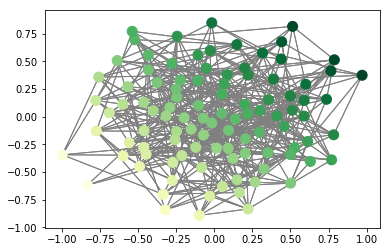

In [7]:
G0 = gt.Graph()
G0.from_numpy_array(nx.adjacency_matrix(g1).toarray())

G0.nodes.add_data_from_nparray(data=pos1_array, col_names=['pos_x', 'pos_y'], 
                              col_roles={'pos_x': '_x',  'pos_y': '_y'})

G0.add_node_attribute(lambda nodes: nodes['_x'] + nodes['_y'], 'test', 'test')
G0.add_node_attribute(G0.nodes['_x'] + G0.nodes['_y'], 'test_arr', 'test_arr')

G0.draw(node_color='test', cmap=plt.cm.YlGn)
plt.show()

GTable("edge_table", dshape="{id_0: int32, id_1: int32}")[990]
   Index    |    id_0    |    id_1    |
           0|           0|           8|
           1|           0|          28|
           2|           0|          29|
           3|           0|          35|
           4|           0|          37|
           5|           0|          47|
...(990)...
         984|          99|          18|
         985|          99|          20|
         986|          99|          38|
         987|          99|          53|
         988|          99|          83|
         989|          99|          86|

In [ ]:

reload(gt)

G1 = gt.Graph(node_ids=g1.nodes(), edges=g1.edges())

G1.nodes.add_data_from_nparray(data=pos1_array, col_names=['pos_x', 'pos_y'], 
                              col_roles={'pos_x': '_x',  'pos_y': '_y'})

G1.add_node_attribute(lambda nodes: nodes['_x'] + nodes['_y'], 'test', 'test')
G1.add_node_attribute(G1.nodes['_x'] + G1.nodes['_y'], 'test_arr', 'test_arr')

G1.draw(node_color='test', cmap=plt.cm.YlGn)
plt.show()

G1.draw(node_color='test_arr', cmap=plt.cm.YlGn)

In [ ]:
g2 = nx.caveman_graph(3, 10)

pos2 = nx.kamada_kawai_layout(g2)
pos2_array = np.array(list(pos2.values()))

G2 = gt.Graph(node_ids=g2.nodes(), edges=g2.edges())

G2.nodes.add_data_from_nparray(data=pos2_array, col_names=['pos_x', 'pos_y'], 
                              col_roles={'pos_x': '_x',  'pos_y': '_y'})
G2.draw()

In [ ]:
import graphtable as gt
from importlib import reload

reload(gt)

G = gt.read_gexf(path='data/Dyn_Net_DMN.gexf', version='1.2draft')


In [ ]:
G.draw(start=10, end=20)

In [ ]:
G.edges.table.col_roles

In [ ]:
import libgexf

# f = open("data.gexf")
reader = libgexf.FileReader()
reader.init("Dyn_Net_DMN.gexf")
reader.slurp()


gc = reader.getGEXFCopy()

xmd = gc.getMetaData()
xmode = gc.getGraphMode()

xgtype = gc.getGraphType()

if xgtype == 1:
    xg = gc.getDirectedGraph()
elif xgtype == 2:
    xg = gc.getUndirectedGraph()

xd =  gc.getData()

xn = xg.getNodes()

xn.begin()
while xn.hasNext():
    nid = xn.next()
    print('Node {}: {}'.format(nid, xd.getNodeLabel(nid)))
    xnar = xd.getNodeAttributeRow(nid)
    if xnar is not None:
        while xnar.hasNext():
            xnaid = xnar.next()
            print(xnaid, xd.getNodeAttribute(nid, xnaid))
    xnar = xd.getNodeAttributeColumn()
    while xnar.hasNext():
        xnaid = xnar.next()
        print(xnaid)
        print(xd.getNodeAttribute(nid, xnaid))
    
xe = xg.getEdges()

while xe.hasNext():
    eid = xe.next()
    print('Edge {}: {} - {} -- {}'.format(eid, xe.currentSource(), xe.currentTarget(), 
                                          xd.getEdgeAttribute(eid, 'end')))
    xer = xd.getEdgeAttributeRow(eid)
    if xer is not None:
        while xer.hasNext():
            xnaid = xer.next()
            print(xnaid, xe.currentProperty(xnaid))
            
xe = xg.getEdges()
if xe.hasNext():
    eid = xe.next()

    xe.currentProperty(libgexf.Conv_strToUnsignedInt('start'))

In [ ]:
from progressivis.table.dshape import dshape_extract


etg = graph.GTable('table', dshape="{s_id: int, t_id: int}", data=np.array(g.edges()), 
             col_roles={'source': 's_id', 'target': 't_id'})

# etg.add_column("{ss: float32}", np.random.rand(g.number_of_edges(),), col_role='source')

data = {'aa': 123, 'bb': {'0a': '1', '0b': 2}}

data_parsed = util.flatten_dict(data)

df_data = pd.DataFrame(data_parsed)


print(dshape_extract(data_parsed))
print(dshape_extract(df_data))

for k, v in data_parsed.items():
    etg.add_column(dshape_extract({k: v}))
    
# data_parsed['s_id'] = [4]
# data_parsed['t_id'] = [22]
etg.append(data_parsed)